<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/nyc-rolling-sales.csv')
source_data.shape

(84548, 22)

In [ ]:
delete_columns_data = source_data.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT'], axis=1)
delete_columns_data.shape

(84548, 9)

In [ ]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   BUILDING CLASS CATEGORY    84548 non-null  object
 2   BUILDING CLASS AT PRESENT  84548 non-null  object
 3   TOTAL UNITS                84548 non-null  int64 
 4   LAND SQUARE FEET           84548 non-null  object
 5   GROSS SQUARE FEET          84548 non-null  object
 6   YEAR BUILT                 84548 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 8   SALE PRICE                 84548 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.8+ MB


In [ ]:
# '-'가 있는 행 찾기
rows_with_minus_sign = delete_columns_data[delete_columns_data.apply(lambda row: ' -  ' in row.values, axis=1)]

# 해당 행을 삭제
delete_columns_data = delete_columns_data.drop(rows_with_minus_sign.index)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  object
 5   GROSS SQUARE FEET          48244 non-null  object
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.7+ MB


In [ ]:
# 구간 변수 TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, SALE PRICE  (5)

# 구간 변수 타입 변경
delete_columns_data['LAND SQUARE FEET'] = delete_columns_data['LAND SQUARE FEET'].astype(int)
delete_columns_data['GROSS SQUARE FEET'] = delete_columns_data['GROSS SQUARE FEET'].astype(int)
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

In [ ]:
# 범주형 변수 BOROUGH, BUILDING CLASS CATEGORY, BUILDING CLASS AT PRESENT, TAX CLASS AT TIME OF SALE, PRICE_B (5)

# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 PRICE_B
c1 = delete_columns_data['SALE PRICE'] >= delete_columns_data['SALE PRICE'].median()
c0 = delete_columns_data['SALE PRICE'] < delete_columns_data['SALE PRICE'].median()

delete_columns_data.loc[c1, "PRICE_B"] = 1
delete_columns_data.loc[c0, "PRICE_B"] = 0
delete_columns_data.head(3)

,BOROUGH,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,PRICE_B
0,1,07 RENTALS - WALKUP APARTMENTS,C2,5,1633,6440,1900,2,6625000,1.0
3,1,07 RENTALS - WALKUP APARTMENTS,C4,10,2272,6794,1913,2,3936272,1.0
4,1,07 RENTALS - WALKUP APARTMENTS,C2,6,2369,4615,1900,2,8000000,1.0


In [ ]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv', index=False)

타겟 변수 설정

In [ ]:
# SALE PRICE 변수 object에서 float로 변환
import pandas as pd

delete_columns_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv')
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    48244 non-null  int64  
 1   BUILDING CLASS CATEGORY    48244 non-null  object 
 2   BUILDING CLASS AT PRESENT  48244 non-null  object 
 3   TOTAL UNITS                48244 non-null  int64  
 4   LAND SQUARE FEET           48244 non-null  int64  
 5   GROSS SQUARE FEET          48244 non-null  int64  
 6   YEAR BUILT                 48244 non-null  int64  
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64  
 8   SALE PRICE                 48244 non-null  int64  
 9   PRICE_B                    48244 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [ ]:
delete_columns_data['PRICE_B'] = delete_columns_data['PRICE_B'].astype('object')
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  int64 
 5   GROSS SQUARE FEET          48244 non-null  int64 
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  int64 
 9   PRICE_B                    48244 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


이상값 제거(구간 변수)

<Axes: xlabel='SALE PRICE'>

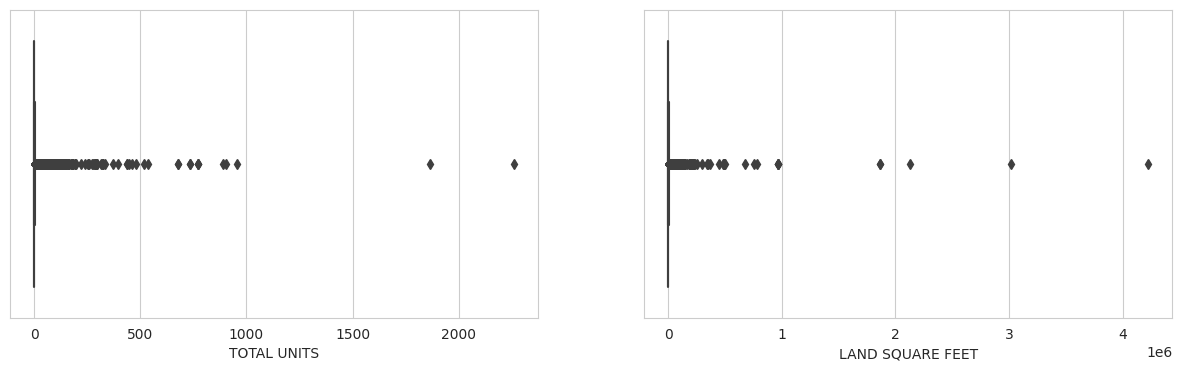

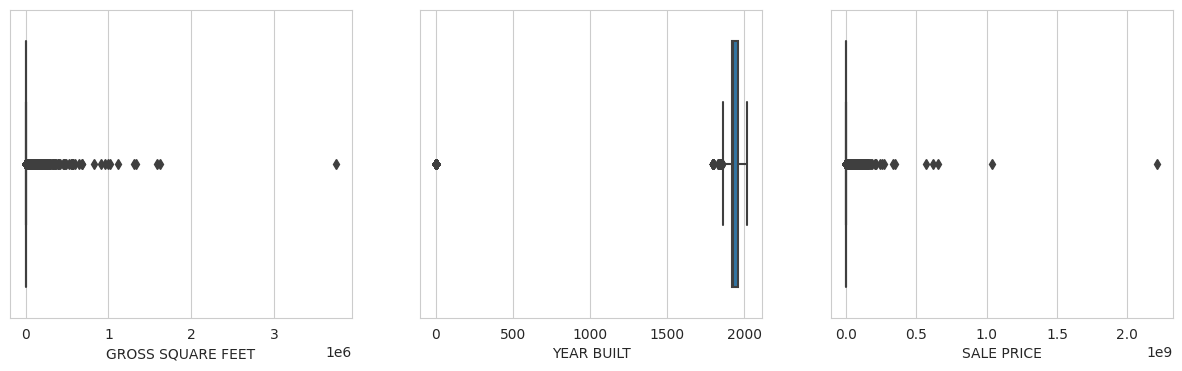

In [ ]:
# 구간 변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'TOTAL UNITS', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'LAND SQUARE FEET', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'GROSS SQUARE FEET', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'YEAR BUILT', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'SALE PRICE', data = delete_columns_data)

In [ ]:
Q1 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.25)
Q3 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TOTAL UNITS               1.0
LAND SQUARE FEET       1658.0
GROSS SQUARE FEET      1692.0
YEAR BUILT               41.0
SALE PRICE           749580.0
dtype: float64


In [ ]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

TOTAL UNITS               -0.5
LAND SQUARE FEET       -1074.0
GROSS SQUARE FEET      -1710.0
YEAR BUILT              1858.5
SALE PRICE          -1043950.0
dtype: float64
TOTAL UNITS                3.5
LAND SQUARE FEET        5558.0
GROSS SQUARE FEET       5058.0
YEAR BUILT              2022.5
SALE PRICE           1954370.0
dtype: float64


In [ ]:
c1 = (delete_columns_data['TOTAL UNITS'] >= -0.5) & (delete_columns_data['TOTAL UNITS'] <= 3.5)
c2 = (delete_columns_data['LAND SQUARE FEET'] >= -1074.0) & (delete_columns_data['LAND SQUARE FEET'] <= 5558.0)
c3 = (delete_columns_data['GROSS SQUARE FEET'] >= -1710.0) & (delete_columns_data['GROSS SQUARE FEET'] <= 5058.0)
c4 = (delete_columns_data['YEAR BUILT'] >= 1858.5) & (delete_columns_data['YEAR BUILT'] <= 2022.5)
c5 = (delete_columns_data['SALE PRICE'] >= -1043950.0) & (delete_columns_data['SALE PRICE'] <= 1954370.0)

df = delete_columns_data[c1 & c2 & c3 & c4 & c5]
df.shape

(37237, 10)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv', index=False)

탐색적 자료 분석 및 시각화

결측값이 50% 초과인 변수 제거

In [ ]:
import pandas as pd


preprocessing_completed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')
preprocessing_completed['PRICE_B'] = preprocessing_completed['PRICE_B'].astype('object')
preprocessing_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    37237 non-null  int64 
 1   BUILDING CLASS CATEGORY    37237 non-null  object
 2   BUILDING CLASS AT PRESENT  37237 non-null  object
 3   TOTAL UNITS                37237 non-null  int64 
 4   LAND SQUARE FEET           37237 non-null  int64 
 5   GROSS SQUARE FEET          37237 non-null  int64 
 6   YEAR BUILT                 37237 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  37237 non-null  int64 
 8   SALE PRICE                 37237 non-null  int64 
 9   PRICE_B                    37237 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.8+ MB


구간 변수 요약 통계 검토

In [ ]:
interval_variable = preprocessing_completed[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]
interval_variable.describe()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,37237.000000,37237.000000,37237.000000,37237.000000,3.723700e+04
mean,1.439831,2079.937562,1525.097672,1946.865027,4.908181e+05
std,0.819393,1393.243339,1051.142158,34.036405,4.103516e+05
min,0.000000,0.000000,0.000000,1865.000000,0.000000e+00
25%,1.000000,1417.000000,960.000000,1920.000000,1.400000e+05
50%,1.000000,2017.000000,1536.000000,1937.000000,4.598000e+05
75%,2.000000,2850.000000,2200.000000,1965.000000,7.250000e+05
max,3.000000,5554.000000,5025.000000,2017.000000,1.950000e+06


In [ ]:
# 구간 변수 왜도 확인
interval_variable.skew()

TOTAL UNITS          0.232459
LAND SQUARE FEET     0.071409
GROSS SQUARE FEET    0.174275
YEAR BUILT           0.623273
SALE PRICE           0.794076
dtype: float64

In [ ]:
# 첨도 확인
interval_variable.kurtosis()

TOTAL UNITS         -0.468185
LAND SQUARE FEET    -0.530130
GROSS SQUARE FEET   -0.361035
YEAR BUILT          -0.710494
SALE PRICE           0.445970
dtype: float64

구간 변수 상관관계 검토

In [ ]:
round(interval_variable.corr(), 2)

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
TOTAL UNITS,1.00,0.38,0.75,-0.19,0.09
LAND SQUARE FEET,0.38,1.00,0.59,-0.25,0.10
GROSS SQUARE FEET,0.75,0.59,1.00,-0.29,0.08
YEAR BUILT,-0.19,-0.25,-0.29,1.00,0.01
SALE PRICE,0.09,0.10,0.08,0.01,1.00


구간 변수 기초 통계량 및 시각화

기초 통계량